# **AIR CRASHES DATA ANALYSIS**

**                       **
## RESEARCH QUESTIONS

#### 1. Number of Air crashes per year.
#### 2. Total fatalities(both ground & air) per year.
#### 3. Relationship between the total number of people aboard and the number of survivors in air crashes.
#### 4. Monthly crash patterns.
#### 5. Crash distribution by quarter (Q1–Q4).
#### 6. Top 5 countries by number of deaths.
#### 7. Most crash-prone manufacturers.
#### 8. Frequent Aircraft Types Involved in crashes.
#### 9. Aircraft with the highest number of survivors.
#### 10.Aircrafts with the highest number of passengers.


**                        **


## Data preparation and cleaning 

In [ ]:
pip install fuzzywuzzy python-Levenshtein

In [ ]:
pip install squarify

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import scipy.stats as stats 

In [2]:
# loading the dataset

df = pd.read_excel("datasets/aircrahesFullDataUpdated_2024_cleaned.xlsx")

In [3]:
df.sample()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
2910,1982,Qtr 2,June,28,USSRAeroflot,Yakovlev,Yakovlev YAK 42CCCP,Southern Belarus USSRAeroflot,NaN,0,132,132


In [4]:
df.shape

(5035, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5035 non-null   int64 
 1   Quarter                5035 non-null   object
 2   Month                  5035 non-null   object
 3   Day                    5035 non-null   int64 
 4   Country/Region         4925 non-null   object
 5   Aircraft Manufacturer  5035 non-null   object
 6   Aircraft               5035 non-null   object
 7   Location               5035 non-null   object
 8   Operator               4872 non-null   object
 9   Ground                 5035 non-null   int64 
 10  Fatalities (air)       5035 non-null   int64 
 11  Aboard                 5035 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 472.2+ KB


In [6]:
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,Papua New Guinea,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,India,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,Switzerland,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,Democratic Republic of Congo,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,Pakistan,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


#### cleaning the  object column values for consistency

In [7]:
import re

# Replace common "missing" placeholders with NaN
df.replace(
    to_replace=[r'^\s*$', r'^\s*N/A\s*$', r'^\s*na\s*$', r'^\s*-\s*$'],
    value=np.nan,
    regex=True,
    inplace=True
)

# Clean spaces and format strings
df = df.apply(
    lambda col: col.map(
        lambda x: re.sub(r'\s+', ' ', x.strip()).title()
        if isinstance(x, str) and pd.notnull(x)
        else x
)
)

In [8]:
df[["Location", "Country/Region", "Operator"]].isnull().sum()


Location            0
Country/Region    110
Operator          163
dtype: int64

#### Cleaning the N/A, NAN entries in "Country/Region", "Operator" columns

In [9]:
df[df["Country/Region"].isnull()][['Location', "Country/Region", "Aircraft Manufacturer" , "Aircraft","Location","Operator" ]].isnull()

,Location,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator
617,False,True,False,False,False,False
619,False,True,False,False,False,False
621,False,True,False,False,False,False
1140,False,True,False,False,False,False
1146,False,True,False,False,False,False
...,...,...,...,...,...,...
2100,False,True,False,False,False,False
2101,False,True,False,False,False,False
2102,False,True,False,False,False,False
2103,False,True,False,False,False,False


In [ ]:
df["Country/Region"].unique()

In [ ]:
df["Operator"].unique()

In [12]:
import re
import pandas as pd

# Example: df = pd.read_csv("air_crashes.csv")

# 1️⃣ List of countries for matching
countries_list = [
    "Afghanistan","Algeria","Angola","Argentina","Australia","Austria","Bahamas",
    "Bangladesh","Belgium","Belize","Benin","Bolivia","Botswana","Brazil","Bulgaria",
    "Burkina Faso","Cambodia","Cameroon","Canada","Central African Republic","Chad",
    "Chile","China","Colombia","Comoros","Congo","Democratic Republic of the Congo",
    "Costa Rica","Croatia","Cuba","Cyprus","Czech Republic","Denmark","Djibouti",
    "Dominican Republic","Ecuador","Egypt","El Salvador","Equatorial Guinea","Eritrea",
    "Estonia","Ethiopia","Fiji","Finland","France","Gabon","Gambia","Georgia","Germany",
    "Ghana","Greece","Guatemala","Guinea","Guinea-Bissau","Guyana","Haiti","Honduras",
    "Hungary","Iceland","India","Indonesia","Iran","Iraq","Ireland","Israel","Italy",
    "Ivory Coast","Jamaica","Japan","Jordan","Kazakhstan","Kenya","Kuwait","Kyrgyzstan",
    "Laos","Latvia","Lebanon","Lesotho","Liberia","Libya","Lithuania","Luxembourg",
    "Madagascar","Malawi","Malaysia","Maldives","Mali","Malta","Mauritania","Mauritius",
    "Mexico","Moldova","Mongolia","Morocco","Mozambique","Myanmar","Namibia","Nepal",
    "Netherlands","New Zealand","Nicaragua","Niger","Nigeria","North Korea","Norway",
    "Oman","Pakistan","Panama","Papua New Guinea","Paraguay","Peru","Philippines","Poland",
    "Portugal","Qatar","Romania","Russia","Rwanda","Saudi Arabia","Senegal","Serbia",
    "Sierra Leone","Singapore","Slovakia","Slovenia","Solomon Islands","Somalia",
    "South Africa","South Korea","Spain","Sri Lanka","Sudan","Suriname","Swaziland",
    "Sweden","Switzerland","Syria","Taiwan","Tajikistan","Tanzania","Thailand","Togo",
    "Trinidad and Tobago","Tunisia","Turkey","Turkmenistan","Uganda","Ukraine",
    "United Arab Emirates","United Kingdom","United States","Uruguay","Uzbekistan",
    "Vanuatu","Venezuela","Vietnam","Yemen","Zambia","Zimbabwe"
]

# 2️⃣ Lookup dictionary for known operators
operator_lookup = {
    "british overseas airways": "British Overseas Airways Corporation",
    "air france": "Air France",
    "united airlines": "United Airlines",
    "u.s. air force": "U.S. Air Force",
    "u.s. navy": "U.S. Navy",
    "pan american": "Pan American World Airways",
    "aeroflot": "Aeroflot",
    "petroleum helicopter": "Petroleum Helicopters Inc.",
    "klm royal dutch": "KLM Royal Dutch Airlines",
    # extend as needed...
}

# 3️⃣ Detect country in Location
def detect_country(location):
    if pd.isnull(location):
        return None
    text = str(location)
    for country in countries_list:
        if re.search(rf"\b{re.escape(country)}\b", text, flags=re.IGNORECASE):
            return country
    return None

# 4️⃣ Detect operator in Location
def detect_operator(location):
    if pd.isnull(location):
        return None
    text = str(location).lower()
    for key, std in operator_lookup.items():
        if re.search(rf"\b{re.escape(key)}\b", text):
            return std
    return None

# 5️⃣ Fill missing Country/Region
df["Country/Region"] = df.apply(
    lambda row: row["Country/Region"] if pd.notnull(row["Country/Region"]) else detect_country(row["Location"]),
    axis=1
)

# 6️⃣ Fill missing Operator
df["Operator"] = df.apply(
    lambda row: row["Operator"] if pd.notnull(row["Operator"]) else detect_operator(row["Location"]),
    axis=1
)

# 7️⃣ Replace any remaining NaN values without inplace (avoids FutureWarning)
df["Country/Region"] = df["Country/Region"].fillna("Unknown")
df["Operator"] = df["Operator"].fillna("Unknown")

# 8️⃣ Final check
print(df[["Location", "Country/Region", "Operator"]].isnull().sum())
print(df[["Location", "Country/Region", "Operator"]].head(15))


Location          0
Country/Region    0
Operator          0
dtype: int64
                           Location                Country/Region  \
0                           Kainatu              Papua New Guinea   
1                             Delhi                         India   
2                        Near Basel                   Switzerland   
3                            Pepa -  Democratic Republic Of Congo   
4                      Pindi-Khut -                      Pakistan   
5                          Taipei -                        Taiwan   
6                    Near Fairbanks                        Alaska   
7                     Near Sloan 10       United State Of America   
8           Near Konduz Afghanistan                   Afghanistan   
9   Near Mazâr-E Charif Afghanistan                   Afghanistan   
10           Near Kholm Afghanistan                   Afghanistan   
11          Lashkar Gah Afghanistan                   Afghanistan   
12      Bagram Air Base Afghan

In [ ]:
df.info()

In [14]:
df.sample(5)

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
4442,1989,Qtr 4,October,4,Ontario,Boeing,Boeing Kc 135A56,Perth Ontario,Canada Military - U.S. Air Force,0,4,4
3254,2002,Qtr 1,March,17,Republic,Let,Let 410Uvp Ej2,Off Djibouti Republic,Airlines Djiboutidjibouti Of,0,4,4
1154,1960,Qtr 4,December,22,Air Force,Douglas,Douglas Dc 3Pi,Cebu City Philippines,Lines Air Philippine,0,28,37
3958,1992,Qtr 4,November,30,Montana,Lockheed,Lockheed C 141B / Lockheed C141B650255/660142,Near Harlem Montana,Force Air U.S. - Military / Force Air U.S. - M...,0,13,13
1286,1969,Qtr 4,December,22,Vietnam,Douglas,Douglas Dc 6Bb,Nha Trang Vietnam,Vietnam) (South Vietnam Air,24,10,77


In [15]:
# creating survivors column
df["Survivors"] = df["Aboard"] - df["Fatalities (air)"]

# to ensure no negative value
df["Survivors"] = df["Survivors"].clip(lower=0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5035 non-null   int64 
 1   Quarter                5035 non-null   object
 2   Month                  5035 non-null   object
 3   Day                    5035 non-null   int64 
 4   Country/Region         5035 non-null   object
 5   Aircraft Manufacturer  5035 non-null   object
 6   Aircraft               5035 non-null   object
 7   Location               5035 non-null   object
 8   Operator               5035 non-null   object
 9   Ground                 5035 non-null   int64 
 10  Fatalities (air)       5035 non-null   int64 
 11  Aboard                 5035 non-null   int64 
 12  Survivors              5035 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 511.5+ KB


In [17]:
df.tail(10)

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,Survivors
5025,1973,Qtr 3,September,11,Yugoslavia,Aerospatiale Caravelle,Aerospatiale Caravelle 6Nyu Ahd,Moganik Yugoslavia,Airlines Yugoslav Jat,0,41,41,0
5026,1950,Qtr 3,September,21,Yugoslavia,Douglas,Douglas Dc 3Yu,Near Zagreb Yugoslavia,Airlines Yugoslav Jat,0,10,11,1
5027,1933,Qtr 3,September,12,Yugoslavia,Farman,Farman F 306Yu,Near Ljubljana Yugoslavia,Aeroput,0,8,8,0
5028,1944,Qtr 3,September,2,Yugoslavia,Junkers,Junkers Ju52/3Md Auaw,Belgrad Yugoslavia,Lufthansa Deutsche,0,5,5,0
5029,2010,Qtr 3,September,21,Zabul,Sikorsky,Sikorsky Uh 60 Black Hawk 93,Chopan District Zabul,Afghanistan Province International Security As...,0,10,13,3
5030,1980,Qtr 3,September,17,Zaire,De Havilland,De Havilland Dhc 5 Buffalo9T,Near Kindu Zaire,Force Air Zairean - Military,0,36,36,0
5031,1997,Qtr 3,September,12,Zaire,De Havilland Canada,De Havilland Canada Dhc 6 Twin Otter 3009Q,Near Uvira Zaire,Commuter Air Tmk,0,22,22,0
5032,1984,Qtr 3,September,11,Zaire,Handley Page Dart Herald,Handley Page Dart Herald 2029Q Cah,Near The Kwango River Zaire,Services Aero Mmm,0,30,30,0
5033,1980,Qtr 3,September,14,Zaire,Lockheed Hercules,Lockheed Hercules C 1309T,Kindu Zaire,Zaïroise Aérienne Force - Military,0,36,36,0
5034,1961,Qtr 3,September,17,Zambia,Douglas,Douglas Dc 6Bse,Ndola Zambia,Sweden Transair,0,16,16,0


#### Descriptive Statistics 

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5035.0,1970.991063,24.814467,1908.0,1951.0,1970.0,1992.0,2024.0
Day,5035.0,15.785104,8.794474,1.0,8.0,16.0,23.0,31.0
Ground,5035.0,1.704469,55.105115,0.0,0.0,0.0,0.0,2750.0
Fatalities (air),5035.0,22.218868,34.948929,0.0,4.0,11.0,25.0,583.0
Aboard,5035.0,31.107249,45.740185,0.0,7.0,16.0,34.5,644.0
Survivors,5035.0,8.902880,31.164766,0.0,0.0,0.0,3.0,516.0


In [19]:
# text columns

df.describe(include="object").T

,count,unique,top,freq
Quarter,5035,4,Qtr 4,1368
Month,5035,12,December,497
Country/Region,5035,637,Russia,225
Aircraft Manufacturer,5035,624,Douglas,998
Aircraft,5035,3522,Boeing B 737,73
Location,5035,4165,Moscow Russia,16
Operator,5035,2627,Aeroflot,239


In [20]:
# all columns

df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,5035.0,NaN,NaN,NaN,1970.991063,24.814467,1908.0,1951.0,1970.0,1992.0,2024.0
Quarter,5035,4,Qtr 4,1368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,5035,12,December,497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,5035.0,NaN,NaN,NaN,15.785104,8.794474,1.0,8.0,16.0,23.0,31.0
Country/Region,5035,637,Russia,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aircraft Manufacturer,5035,624,Douglas,998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aircraft,5035,3522,Boeing B 737,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5035,4165,Moscow Russia,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Operator,5035,2627,Aeroflot,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ground,5035.0,NaN,NaN,NaN,1.704469,55.105115,0.0,0.0,0.0,0.0,2750.0


In [ ]:
# correlation

In [21]:
df.corr(numeric_only=True)

,Year,Day,Ground,Fatalities (air),Aboard,Survivors
Year,1.000000,0.001733,0.027711,0.161195,0.215560,0.135344
Day,0.001733,1.000000,-0.012435,-0.006761,0.000412,0.008170
Ground,0.027711,-0.012435,1.000000,0.032421,0.020136,-0.006816
Fatalities (air),0.161195,-0.006761,0.032421,1.000000,0.732486,-0.046447
Aboard,0.215560,0.000412,0.020136,0.732486,1.000000,0.645945
Survivors,0.135344,0.008170,-0.006816,-0.046447,0.645945,1.000000


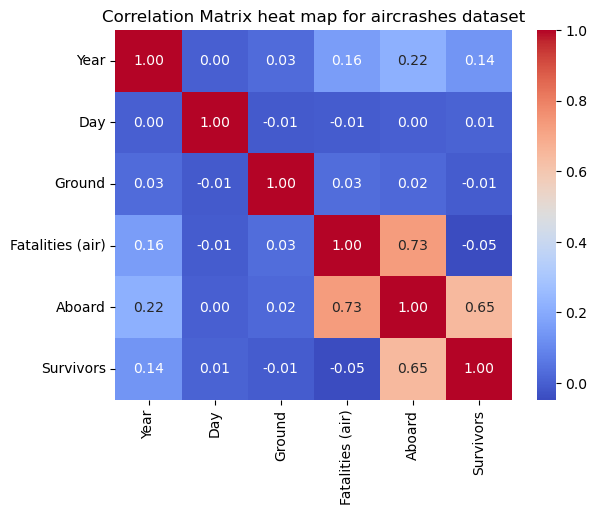

In [22]:
# heatmap

sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix heat map for aircrashes dataset")
plt.show()

**                       **
## RESEARCH QUESTIONS

#### 1. Number of Air crashes per year.

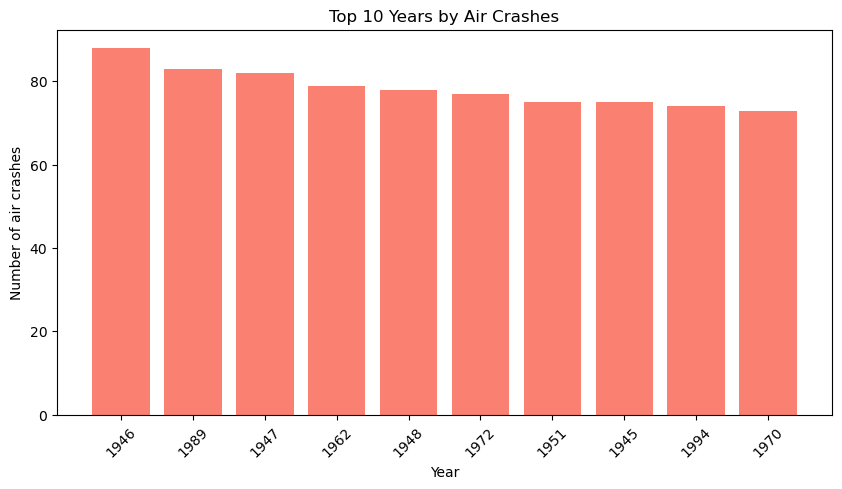

In [50]:
temp1 = df.groupby("Year").size().reset_index(name="Crash Count").sort_values(by="Crash Count", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(temp1["Year"].astype(str), temp1["Crash Count"], color="salmon")  # converted year to string for categorical x-axis
plt.title("Top 10 Years by Air Crashes")
plt.xlabel("Year")
plt.ylabel("Number of air crashes")
plt.xticks(rotation=45)
plt.show()


#### 2. Total fatalities(both ground & air) per year.

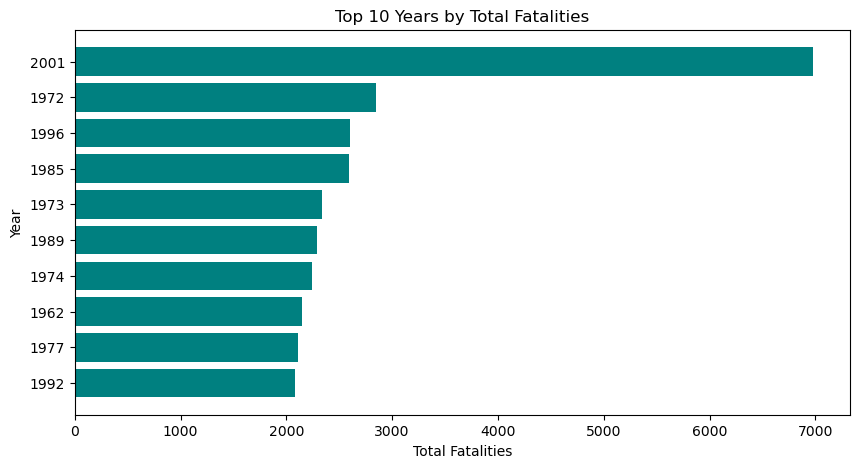

In [44]:
df["total_fatalities"] = df["Ground"] + df["Fatalities (air)"]

temp2 = (
    df.groupby("Year", as_index=False)["total_fatalities"]
      .sum()
      .sort_values(by="total_fatalities", ascending=False)
      .head(10)  # take top 10 years
)

plt.figure(figsize=(10,5))
plt.barh(temp2["Year"].astype(str), temp2["total_fatalities"], color="teal")
plt.title("Top 10 Years by Total Fatalities")
plt.xlabel("Total Fatalities")
plt.ylabel("Year")
plt.gca().invert_yaxis()
plt.show()


#### 3. Relationship between the total number of people aboard and the number of survivors in air crashes.

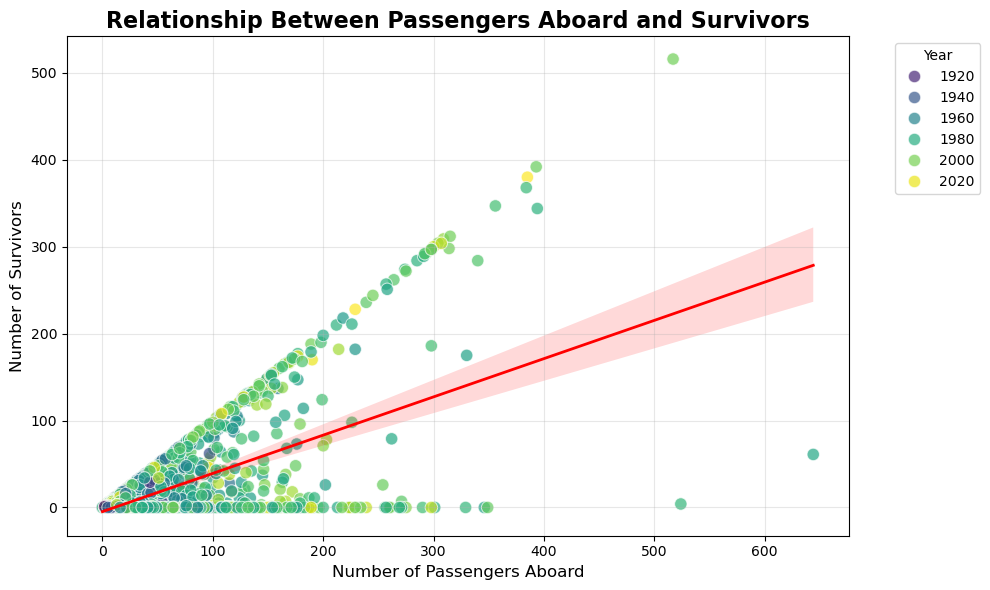

In [94]:
# Scatter plot
plt.figure(figsize=(10, 6))

# Plotting the scatter with hue for year
sns.scatterplot(
    data=df,
    x="Aboard",
    y="Survivors",
    hue="Year",
    palette="viridis",
    alpha=0.7,
    edgecolor="w",
    s=80
)

# Regression line (no hue, so only one line is drawn)
sns.regplot(
    data=df,
    x="Aboard",
    y="Survivors",
    scatter=False,  # no scatter points here, already plotted
    color="red",
    line_kws={"linewidth": 2}
)

plt.title("Relationship Between Passengers Aboard and Survivors", fontsize=16, weight='bold')
plt.xlabel("Number of Passengers Aboard", fontsize=12)
plt.ylabel("Number of Survivors", fontsize=12)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### 4. Monthly crash patterns.

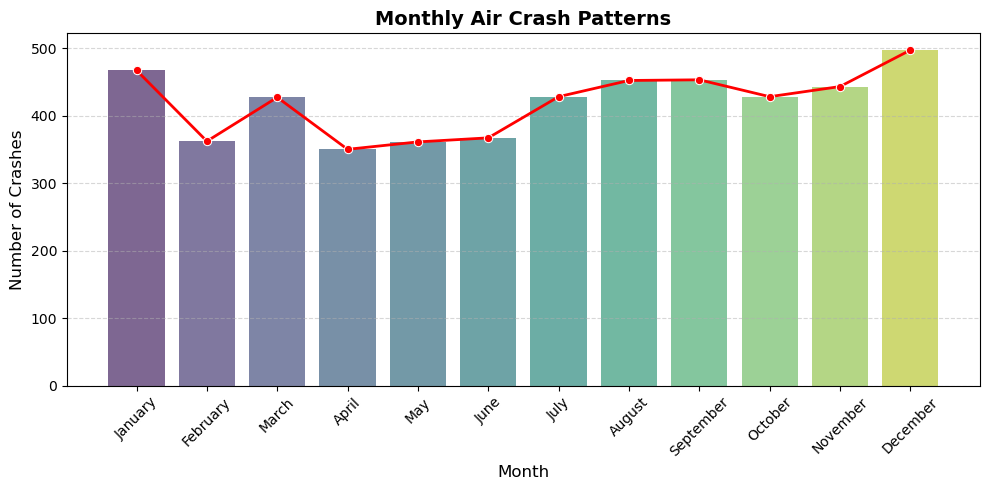

In [56]:
# Defining the month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Grouping by month in correct order
monthly_crashes = df.groupby('Month').size().reindex(month_order).reset_index(name='Crash Count')

# Plotting visual
plt.figure(figsize=(10, 5))

# Barplot
sns.barplot(data=monthly_crashes, x='Month', y='Crash Count',
            hue='Month', order=month_order, palette='viridis', alpha=0.7, legend=False)

# Line plot overlay
sns.lineplot(data=monthly_crashes, x='Month', y='Crash Count',
             color='red', marker='o', linewidth=2)

plt.title('Monthly Air Crash Patterns', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 5. Crash distribution by quarter (Q1–Q4).

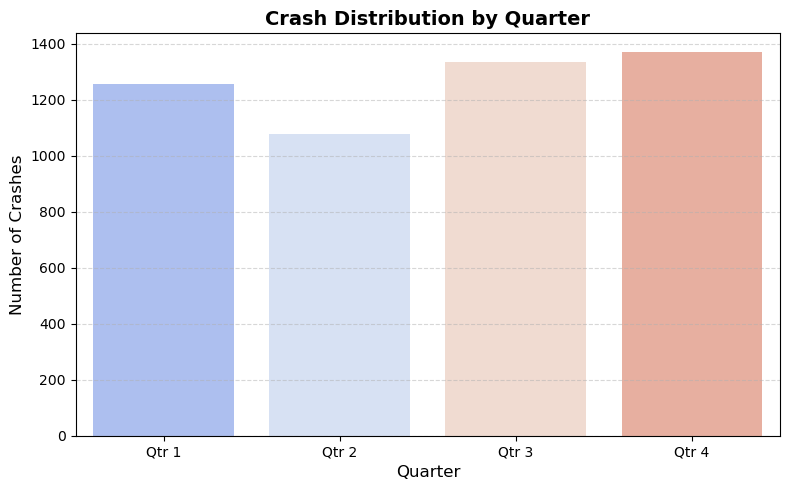

In [60]:
# Match exactly what is in the dataset
quarter_order = ['Qtr 1', 'Qtr 2', 'Qtr 3', 'Qtr 4']

# Grouping by quarter and counting crashes
quarterly_crashes = (
    df.groupby('Quarter')
      .size()
      .reindex(quarter_order, fill_value=0)  # fill_value=0 ensures missing quarters get 0
      .reset_index(name='Crash Count')
)

# Bar chart
plt.figure(figsize=(8, 5))
sns.barplot(
    data=quarterly_crashes,
    x='Quarter',
    y='Crash Count',
    hue='Quarter',
    order=quarter_order,
    palette='coolwarm',
    alpha=0.7,
    legend=False
)

# Titles and labels
plt.title('Crash Distribution by Quarter', fontsize=14, fontweight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 6. Top 5 countries by number of deaths.

In [71]:
# Mapping for known misclassified regions
region_to_country = {
    "California": "United States",
    "Alaska": "United States",
    "Texas": "United States",
    "Florida": "United States",
    "Illinois": "United States",
    "Georgia": "United States",
    "Washington": "United States",
    "Colorado": "United States",
    "Ohio": "United States",
    "Missouri": "United States",

    # UK parts
    "England": "United Kingdom",
    "Scotland": "United Kingdom",
    "Wales": "United Kingdom",
    "Northern Ireland": "United Kingdom",

    # Other corrections
    "Ussraeroflot": "Soviet Union",
    "South": None,  # leave as-is unless clarified
}

# Function to generate clean country column
def clean_country(row):
    country = row["Country/Region"]

    if country in region_to_country:
        return region_to_country[country] if region_to_country[country] else country

    if country == "New":
        loc = str(row["Location"])
        if "New York" in loc or "New Jersey" in loc or "New Mexico" in loc:
            return "United States"
        elif "New Zealand" in loc:
            return "New Zealand"
        elif "New Guinea" in loc:
            return "Papua New Guinea"
        else:
            return country

    return country

# Create the new column without touching the original
df["Clean_Country"] = df.apply(clean_country, axis=1)


In [72]:
df["Country/Region"].value_counts()  # original
df["Clean_Country"].value_counts()   # cleaned version


Clean_Country
United States        513
Russia               225
Brazil               169
Colombia             149
France               131
                    ... 
Argentinade            1
Wyus                   1
Wa                     1
Virginia.American      1
Uaegulf                1
Name: count, Length: 625, dtype: int64

In [75]:
# FINAL CLEANUP FOR COUNTRY NAMES

from fuzzywuzzy import process

# Getting a list of valid, known country names
valid_countries = [
    "United States", "Russia", "Brazil", "Colombia", "France", "India", "China", 
    "Indonesia", "Germany", "Italy", "New Zealand", "Papua New Guinea", "Mexico",
    "England", "South Africa", "Philippines", "Spain", "Bolivia", "Australia", 
    "Egypt", "Argentina", "Afghanistan", "Iran", "Peru", "Angola", "Japan", 
    "Venezuela", "Ecuador", "Greece", "Canada", "Congo", "Pakistan", "Morocco", 
    "Ukraine", "Vietnam", "Sudan", "Nepal", "Nigeria", "Chile"
    # You can add more here if needed
]

# Step 2: Manual mapping for rare weird cases
# These are fixed by human knowledge because fuzzy matching might guess wrong
manual_map = {
    "Wyus": "United States",
    "Virginia.American": "United States",
    "Argentinade": "Argentina",
    "Uaegulf": "United Arab Emirates",
    "Wa": "United States",   # Likely Washington
    "Ussraeroflot": "Russia", # Soviet Union airline
    "Tex": "United States",   # Likely Texas
    "Californi": "United States",
    "Florid": "United States"
}

# Step 3: Function to clean each country value
def final_country_clean(name):
    # If exact match in manual map → return fixed version
    if name in manual_map:
        return manual_map[name]
    
    # If already valid → return as is
    if name in valid_countries:
        return name
    
    # Otherwise, use fuzzy matching to find closest match in valid list
    match, score = process.extractOne(name, valid_countries)
    
    # Accept match only if confidence score is high (>=80)
    if score >= 80:
        return match
    
    # If no good match, keep the original
    return name

# Step 4: Apply the cleaning function to your Clean_Country column
df["Clean_Country_Final"] = df["Clean_Country"].apply(final_country_clean)

# Step 5: Check result
print(df["Clean_Country_Final"].value_counts().head(20))


Clean_Country_Final
United States     534
Russia            240
Brazil            174
Colombia          152
France            145
India             138
United Kingdom    113
China             102
Indonesia          94
Germany            90
New Zealand        88
Italy              85
Mexico             83
South Africa       81
Soviet Union       72
Philippines        61
Australia          54
Spain              52
Afghanistan        50
Bolivia            50
Name: count, dtype: int64


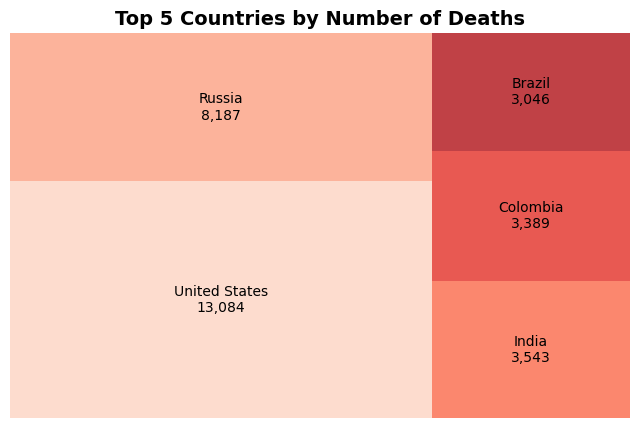

In [77]:
# Top 5 countries by fatalities
top5_countries = (
    df.groupby('Clean_Country_Final')['total_fatalities']
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .reset_index()
)

# Treemap chart
import squarify

plt.figure(figsize=(8, 5))
sizes = top5_countries['total_fatalities']
labels = [
    f"{country}\n{deaths:,}" 
    for country, deaths in zip(top5_countries['Clean_Country_Final'], sizes)
]

squarify.plot(
    sizes=sizes,
    label=labels,
    color=sns.color_palette('Reds', len(sizes)),
    alpha=0.8
)

plt.title('Top 5 Countries by Number of Deaths', fontsize=14, weight='bold')
plt.axis('off')
plt.show()


#### 7. Most crash-prone manufacturers.

  Aircraft Manufacturer  Crash Count
0               Douglas          998
1                Boeing          388
2               Antonov          284
3              Lockheed          212
4   De Havilland Canada          158
5              Ilyushin          139
6                Fokker          126
7               Curtiss          126
8     Mcdonnell Douglas          126
9          De Havilland          108


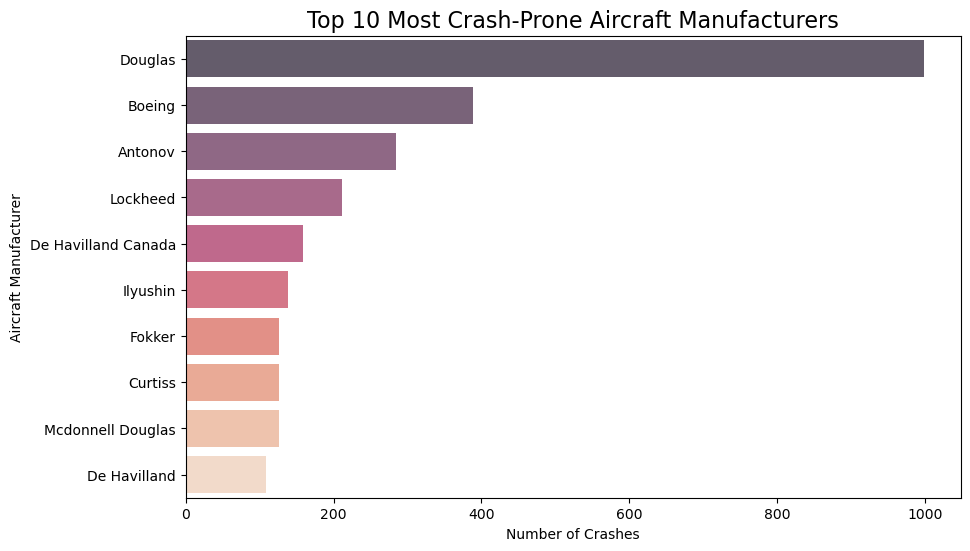

In [81]:
# Grouping by Aircraft Manufacturer and count crashes
manufacturer_counts = df['Aircraft Manufacturer'].value_counts().head(10).reset_index()
manufacturer_counts.columns = ['Aircraft Manufacturer', 'Crash Count']

# Displaying counts
print(manufacturer_counts)

# Plotting the visual
plt.figure(figsize=(10,6))
sns.barplot(
    data=manufacturer_counts,
    x="Crash Count",
    y="Aircraft Manufacturer",
    hue="Aircraft Manufacturer",
    palette="rocket",
    alpha=0.7,
    legend=False
)

plt.title("Top 10 Most Crash-Prone Aircraft Manufacturers", fontsize=16)
plt.xlabel("Number of Crashes")
plt.ylabel("Aircraft Manufacturer")
plt.show()


#### 8. Frequent Aircraft Types Involved in crashes.

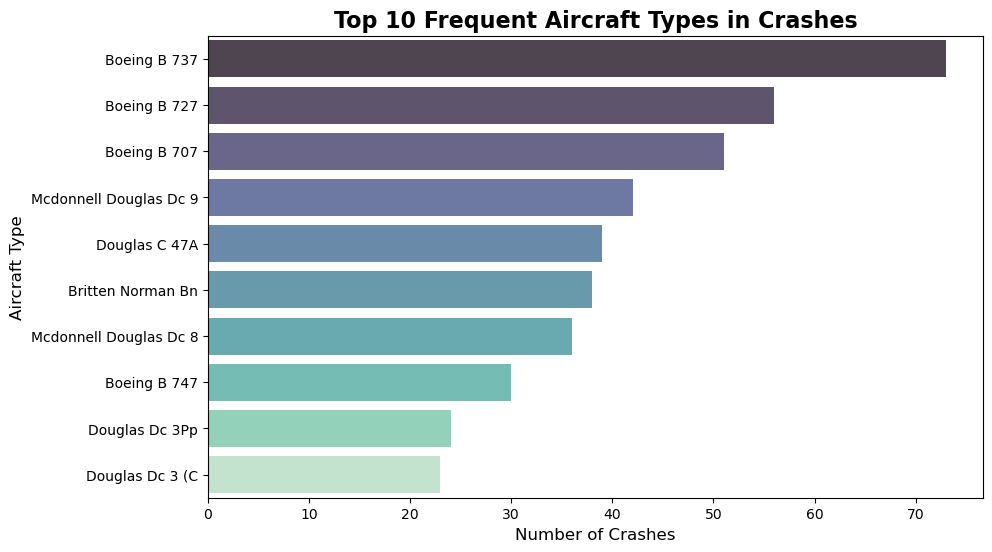

In [86]:
# Grouping by 'Aircraft' and count
aircraft_counts = (
    df['Aircraft']
    .value_counts()
    .head(10)
    .reset_index()
)
aircraft_counts.columns = ['Aircraft', 'Crash Count']

# Plotting visual
plt.figure(figsize=(10, 6))
sns.barplot(
    data=aircraft_counts,
    x="Crash Count",
    y="Aircraft",
    hue="Aircraft",
    palette="mako",
    alpha=0.8,
    legend=False
)
plt.title("Top 10 Frequent Aircraft Types in Crashes", fontsize=16, weight='bold')
plt.xlabel("Number of Crashes", fontsize=12)
plt.ylabel("Aircraft Type", fontsize=12)
plt.show()


#### 9. Aircraft with the highest number of survivors.

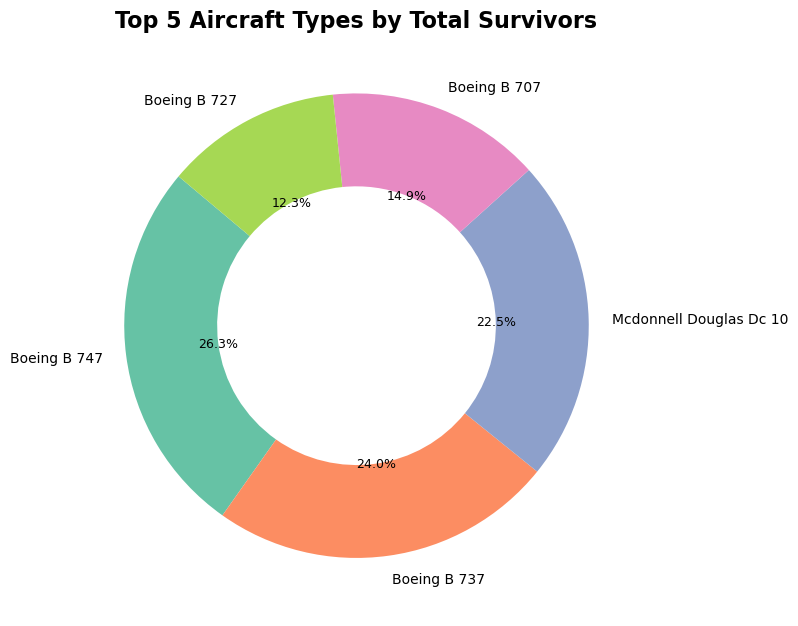

In [88]:
# Grouping by Aircraft and summing the survivors
survivor_counts = (
    df.groupby("Aircraft")["Survivors"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# Plotting as a donut chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set2", len(survivor_counts))
wedges, texts, autotexts = plt.pie(
    survivor_counts,
    labels=survivor_counts.index,
    autopct="%1.1f%%",
    colors=colors,
    startangle=140,
    wedgeprops=dict(width=0.4)  # Makes it a donut
)

# Improving label readability
for text in texts:
    text.set(size=10)
for autotext in autotexts:
    autotext.set(size=9, color="black")

plt.title("Top 5 Aircraft Types by Total Survivors", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


#### 10.Aircrafts with the highest number of passengers.

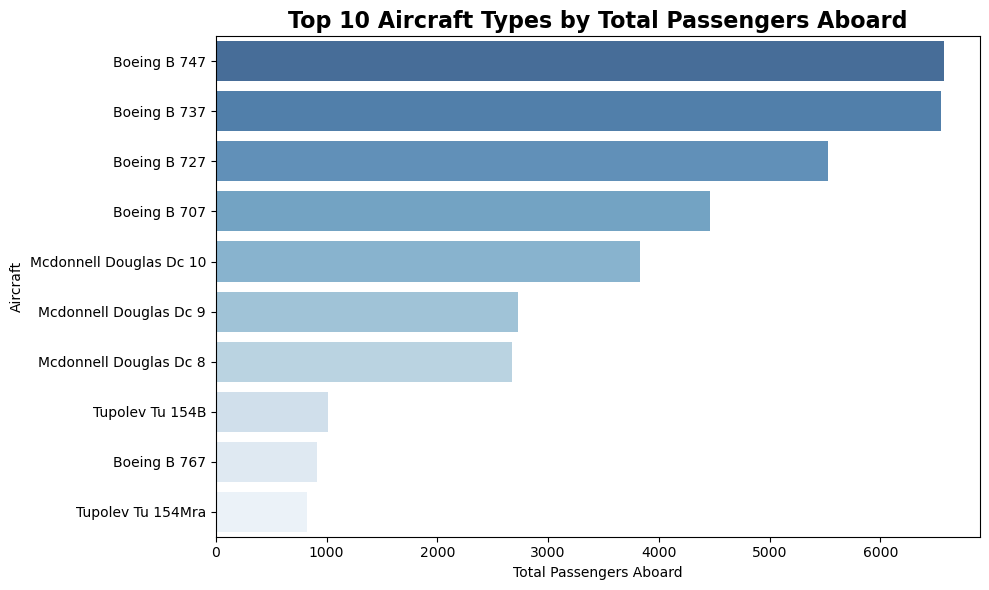

In [91]:
# Grouping by Aircraft and summing the passengers aboard
passenger_counts = (
    df.groupby("Aircraft")["Aboard"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plotting a barchart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=passenger_counts.values,
    y=passenger_counts.index,
    palette="Blues_r",
    hue=passenger_counts.index,
    alpha=0.8,
    legend = False
)

plt.title("Top 10 Aircraft Types by Total Passengers Aboard", fontsize=16, weight='bold')
plt.xlabel("Total Passengers Aboard")
plt.ylabel("Aircraft")
plt.tight_layout()
plt.show()


#### exporting the clean data as an excel file

In [99]:
df.to_excel("air_crashes_cleaned_data.xlsx", index=False)

In [98]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities (air)', 'Aboard', 'Survivors', 'total_fatalities',
       'Country'],
      dtype='object')

## **Findings**
**                       **

1. Consistent Annual Fatalities Trend – The number of air crashes and fatalities shows clear patterns over the years, with some peaks likely linked to specific events or operational factors.



2. Quarterly Patterns – Certain quarters, particularly Q1 and Q3, recorded higher crash counts, suggesting seasonal or environmental factors may be at play.


3. Country Concentration – A small group of countries accounts for a disproportionately high number of fatalities, indicating possible systemic safety issues or heavier air traffic volumes in those regions.


4. Manufacturer Involvement – A handful of aircraft manufacturers appear frequently in crash data, potentially reflecting their larger market share but also warranting closer safety scrutiny.


5. Survivorship Trends – Some aircraft types recorded higher survival rates, hinting at differences in design, safety protocols, or operational handling.


## **Recommendations**
**                        **

1. Seasonal Risk Mitigation – Aviation authorities should implement heightened safety checks and weather monitoring during historically high-risk quarters.

2. Targeted Safety Programs – Countries with high fatality rates should receive priority for safety audits, crew retraining, and infrastructure improvements.

3. Manufacturer Safety Collaboration – Engage top manufacturers in joint safety reviews and encourage adoption of best design and maintenance practices.

4. Incident Pattern Research – Conduct further investigation into why certain aircraft types have higher survival rates to inform fleet procurement and operational strategies.

5. Public & Crew Awareness – Use data-driven campaigns to educate passengers and crew about critical safety measures proven to increase survival chances.